In [1]:
#dependencies
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [2]:
#state abbeviations dictionary
state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [3]:
# import csv of police involved shooting fatalities from Washington Post
wapo=pd.read_csv("ois_clean.csv")
wapo.head()

,Unnamed: 0,name,date,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,0,Tim Elliot,2015-01-02,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,1,Lewis Lee Lembke,2015-01-02,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,2,John Paul Quintero,2015-01-03,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,3,Matthew Hoffman,2015-01-04,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,4,Michael Rodriguez,2015-01-04,other,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [4]:
# import csv of US census regions/divisions from:
# (https://github.com/cphalpert/census-regions/blob/master/us%20census%20bureau%20regions%20and%20divisions.csv)
regions=pd.read_csv("us census bureau regions and divisions.csv")
regions=regions.drop(regions.index[7])
regions=regions.drop(columns="State")
regions=regions.rename(columns={"State Code": "state", "Region": "region", "Division": "division"})
regions


,state,region,division
0,AK,West,Pacific
1,AL,South,East South Central
2,AR,South,West South Central
3,AZ,West,Mountain
4,CA,West,Pacific
5,CO,West,Mountain
6,CT,Northeast,New England
8,DE,South,South Atlantic
9,FL,South,South Atlantic
10,GA,South,South Atlantic


In [5]:
# create dataframe of incidents per state
armed_df=wapo[["state", "armed"]]
state_counts=armed_df.groupby("state").count()
state_counts=state_counts.reset_index(drop=False)
state_counts.head()

,state,armed
0,AK,19
1,AL,63
2,AR,31
3,AZ,143
4,CA,463


In [6]:
# create dataframe of incidents by victim armed vs. unarmed and weapons involved
weapon_counts=armed_df.groupby("armed").count()
weapon_counts=weapon_counts.reset_index(drop=False)
weapon_counts=weapon_counts.rename(columns={"state":"incidents"})
weapon_counts

,armed,incidents
0,gun,1683
1,knife,434
2,machete,28
3,multiple,15
4,other,153
5,toy weapon,118
6,unarmed,232
7,undetermined,100
8,unknown weapon,26
9,vehicle,211


AttributeError: module 'matplotlib.pyplot' has no attribute 'figsize'

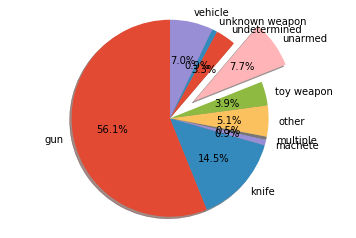

In [21]:
# create pie chart of victim weapons
labels=weapon_counts["armed"]
explode=(0,0,0,0,0,0,0.3,0,0,0)
plt.pie(weapon_counts["incidents"], startangle=90, labels=labels, explode=explode, autopct = "%1.1f%%", shadow=True)
plt.axis("Equal")
plt.figsize(15, 15)

In [8]:
# api call for population below poverty level by state
from config import api_key
url = "https://api.census.gov/data/2016/acs/acs1?get=NAME,B01003_001E,B17001_002E&for=state:*&key="
query_url= url + api_key
census_data = requests.get(query_url).json()

In [9]:
# create dataframe from api data o poverty, drop header, D.C. and Puerto Rico
poverty_df = pd.DataFrame(census_data, columns= ["State Name", "Estimated Population", "Below Poverty Level", "State ID"])
poverty_df=poverty_df.drop(poverty_df.index[[0, 9, 52]])
poverty_df=poverty_df.reset_index(drop=True)
poverty_df.head()

,State Name,Estimated Population,Below Poverty Level,State ID
0,Alabama,4863300,810231,01
1,Alaska,741894,71566,02
2,Arizona,6931071,1107464,04
3,Arkansas,2988248,499225,05
4,California,39250017,5525524,06


In [10]:
# convert objects to integers
poverty_df["est pop"] = poverty_df["Estimated Population"].astype("int") 
poverty_df["Below Poverty Level"] = poverty_df["Below Poverty Level"].astype("int") 
# convert total to percent
poverty_df["% below pov"]=poverty_df["Below Poverty Level"] / poverty_df["est pop"] * 100
# Map state full names to abbreviations
poverty_df["state"]=poverty_df["State Name"].map(state_abbrev)
poverty_df=poverty_df[["state", "% below pov", "est pop"]]

merged_poverty=pd.merge(poverty_df, state_counts, how="inner", on="state")
merged_poverty=merged_poverty.rename(columns={"armed":"incidents"})
merged_poverty["inc per 100k people"]=merged_poverty["incidents"] / (merged_poverty["est pop"] / 100000)
merged_poverty=pd.merge(merged_poverty, regions, how="inner", on="state")
merged_poverty

,state,% below pov,est pop,incidents,inc per 100k people,region,division
0,AL,16.660107,4863300,63,1.295417,South,East South Central
1,AK,9.646392,741894,19,2.561013,West,Pacific
2,AZ,15.978252,6931071,143,2.063173,West,Mountain
3,AR,16.706277,2988248,31,1.037397,South,West South Central
4,CA,14.077762,39250017,463,1.179617,West,Pacific
5,CO,10.806446,5540545,90,1.624389,West,Mountain
6,CT,9.482247,3576452,10,0.279607,Northeast,New England
7,DE,11.365926,952065,9,0.945314,South,South Atlantic
8,FL,14.425813,20612439,189,0.916922,South,South Atlantic
9,GA,15.547578,10310371,90,0.872907,South,South Atlantic


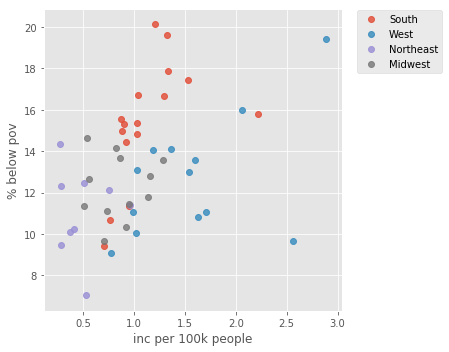

In [11]:
sns.lmplot( x="inc per 100k people", y="% below pov", data=merged_poverty, fit_reg=False, hue="region", legend=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

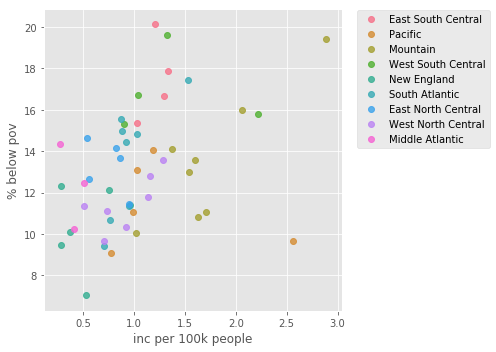

In [12]:
sns.lmplot( x="inc per 100k people", y="% below pov", data=merged_poverty, fit_reg=False, hue="division", legend=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Text(0,0.5,'% of State Population below poverty level')

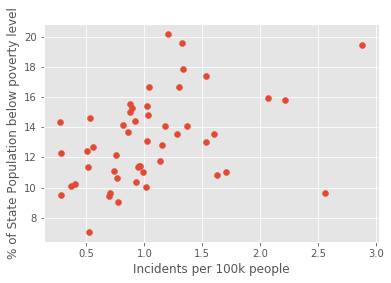

In [13]:
plt.scatter(merged_poverty["inc per 100k people"], merged_poverty["% below pov"])
plt.xlabel("Incidents per 100k people")
plt.ylabel("% of State Population below poverty level")

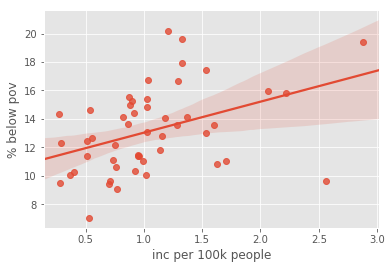

In [14]:
sns.regplot(x="inc per 100k people", y="% below pov", data=merged_poverty)


In [15]:
# api call from census for population by race listed per state
race_criteria="B01003_001E,B03002_003E,B03002_004E,B03002_005E,B03002_006E,B03002_007E,B03002_008E,B03002_009E,B03002_012E,B03002_002E"
race_url = f"https://api.census.gov/data/2016/acs/acs1?get=NAME,{race_criteria}&for=state:*&key="
race_query= race_url + api_key
race_data = requests.get(race_query).json()

In [16]:
race_df = pd.DataFrame(race_data, columns= ["State Name","Total Population","White alone","Black or African American alone",
                                            "American Indian and Alaska Native alone","Asian alone",
                                            "Native Hawaiian and Other Pacific Islander alone","Some other race alone",
                                            "Two or more races","Hispanic or Latino","Not Hispanic or Latino","State ID"])

race_df=race_df.drop(race_df.index[[0,9,52]])
race_df=race_df.reset_index(drop=True)
race_df

,State Name,Total Population,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Hispanic or Latino,Not Hispanic or Latino,State ID
0,Alabama,4863300,3197147,1294572,21225,65100,1341,7537,76692,199686,4663614,01
1,Alaska,741894,452757,21768,104362,44235,9766,1741,55961,51304,690590,02
2,Arizona,6931071,3834724,284478,274472,214132,12834,10072,155584,2144775,4786296,04
3,Arkansas,2988248,2175226,462232,16096,41387,8808,2917,67038,214544,2773704,05
4,California,39250017,14725729,2160958,132153,5518226,137019,105389,1189767,15280776,23969241,06
5,Colorado,5540545,3796733,220728,28993,173588,7397,6313,125575,1181218,4359327,08
6,Connecticut,3576452,2411769,352345,4968,159838,505,11451,73229,562347,3014105,09
7,Delaware,952065,597331,203278,3281,35591,990,1419,23023,87152,864913,10
8,Florida,20612439,11271384,3162469,38654,550606,10290,70928,381530,5126578,15485861,12
9,Georgia,10310371,5484889,3205543,17417,396429,5134,32116,206509,962334,9348037,13


In [20]:
# calculate diversity index as defined by UNC and USA Today: https://www.unc.edu/~pmeyer/carstat/tools.html

#convert objects to integers
race_df["TP"] = race_df["Total Population"].astype("int")
race_df["W"] = race_df["White alone"].astype("int")
race_df["B"] = race_df["Black or African American alone"].astype("int")
race_df["AI"] = race_df["American Indian and Alaska Native alone"].astype("int")
race_df["A"] = race_df["Asian alone"].astype("int")
race_df["PI"] = race_df["Native Hawaiian and Other Pacific Islander alone"].astype("int")
race_df["H"] = race_df["Hispanic or Latino"].astype("int")
race_df["NH"] = race_df["Not Hispanic or Latino"].astype("int")

diversity_index=[]
for index, row in race_df.iterrows():
    # convert totals to percentage of total pop
    row["W"]=row["W"]/row["TP"]
    row["B"]=row["B"]/row["TP"]
    row["AI"]=row["AI"]/row["TP"]
    row["A"]=row["A"]/row["TP"]
    row["PI"]=row["PI"]/row["TP"]
    row["H"]=row["H"]/row["TP"]
    row["NH"]=row["NH"]/row["TP"]
    #calculate index
    diversity_calc = (1-((row["W"]**2 + row["B"]**2 + row["AI"]**2 + row["A"]**2 + row["PI"]**2) * 
                          (row["H"]**2 + row ["NH"]**2))) * 100
    
    diversity_index.append(diversity_calc)

diversity_df=pd.DataFrame({"State":merged_poverty["state"],"Diversity":diversity_index, "Incidents/100k":merged_poverty["inc per 100k people"]})
diversity_df["Diversity"]=diversity_df["Diversity"].round(3)
diversity_df

,Diversity,Incidents/100k,State
0,53.639,1.295417,AL
1,65.428,2.561013,AK
2,82.231,2.063173,AZ
3,51.981,1.037397,AR
4,91.420,1.179617,CA
5,68.623,1.624389,CO
6,65.717,0.279607,CT
7,63.265,0.945314,DE
8,79.754,0.916922,FL
9,68.336,0.872907,GA


Text(0,0.5,'Diversity Index of State')

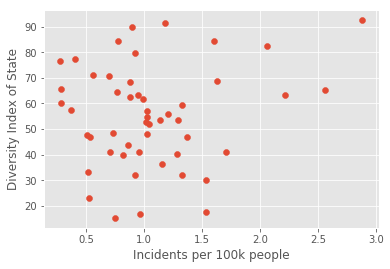

In [18]:
plt.scatter(diversity_df["Incidents/100k"], diversity_df["Diversity"])
plt.xlabel("Incidents per 100k people")
plt.ylabel("Diversity Index of State")

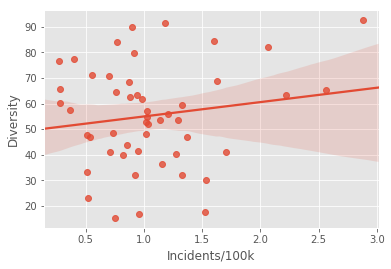

In [19]:
sns.regplot(x="Incidents/100k", y="Diversity", data=diversity_df)